## Tasks performed in the model presented below are:
#### Importing and understading the data.
#### Missing value treatment and outlier analysis
#### Exploratory data analysis to find out the inference about the data and its correlation with the target variables.
#### Transformation of the target variable to handle the data skewness.
#### Data preprocessing
#### Test train split and Feature scaling
#### Data modelling using RFE to identify the top 30 variables.
#### Ridge and Lasso Regression to find the top feature variables and finding the optimal alpha value

## Importing Libraries

In [125]:
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

In [2]:
# Creating a class color for setting print formatting
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

## Data Understanding

In [3]:
#Read the data and creating the dataframe
housing_df = pd.read_csv("train.csv")

In [4]:
# Check if data is loaded or not
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check the no of rows and columns
housing_df.shape

(1460, 81)

In [6]:
#info all the entire data along with types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Summary of the numerical columns in the dataframe
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#List of columns in the data frame
housing_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [9]:
# Check if any null values are present in the data
housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preparation

### Missing Value Treatment

In [10]:
#Checking the number of missing values and its percentage
Total_missing = housing_df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [11]:
#Create a new dataframe named df_cleaned with all columns with data missing < 45% for our  further analysis
#Dropping columns which have more than 45% missing data as imputing more than 45% data may lead to a wrong representation of the original dataset

df_cleaned = housing_df.loc[:,(100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False) < 45]
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Imputing other missing value columns

In [12]:
#Checking the no of unique values in each column
df_cleaned.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [13]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
463     1
464     1
465     1
466     1
467     1
468     1
469     1
470     1
471     1
472     1
473     1
474     1
475     1
476     1
500     1
502     1
547     1
525     1
527     1
528     1
529     1
530     1
531     1
532     1
533     1
534     1
535     1
536     1
537     1
538     1
539     1
540     1
541     1
542     1
543     1
544     1
545     1
526     1
524     1
503     1
523     1
504     1
505     1
506     1
507     1
508     1
509     1
510     1
511     1
512     1
513     1
514     1
515     1
516     1
517     1
518     1
519     1
520     1
521     1
522     1
457     1
456     1
455     1
388     1
390     1
391     1
392     1
393     1
394     1
395     1


0.0       861
108.0       8
72.0        8
180.0       8
120.0       7
16.0        7
106.0       6
200.0       6
340.0       6
80.0        6
170.0       5
132.0       5
320.0       5
360.0       5
84.0        5
252.0       4
178.0       4
76.0        4
336.0       4
268.0       4
168.0       4
100.0       4
456.0       4
246.0       4
160.0       4
300.0       4
288.0       4
270.0       4
183.0       4
220.0       4
40.0        4
196.0       4
210.0       4
216.0       4
99.0        3
272.0       3
169.0       3
166.0       3
128.0       3
148.0       3
350.0       3
186.0       3
104.0       3
312.0       3
226.0       3
116.0       3
110.0       3
420.0       3
130.0       3
90.0        3
74.0        3
145.0       3
176.0       3
70.0        3
42.0        3
50.0        3
240.0       3
256.0       3
174.0       3
136.0       3
82.0        3
44.0        3
208.0       3
85.0        3
344.0       2
306.0       2
153.0       2
212.0       2
318.0       2
203.0       2
215.0       2
338.0 

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
___________________________________________________
864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
987      7
1728     7
1494     6
630      6
1484     6
1056     6
1768     6
1224     6
988      5
990      5
1710     5
1302     5
1656     5
1218     5
1252     5
960      5
1314     5
1144     5
1392     5
1680     4
1362     4
1716     4
1646     4
882      4
1250     4
1632     4
1416     4
1258     4
1442     4
858      4
1800     4
1337     4
1792     4
1709     4
1573     4
1440     4
1652     4
1414     4
1208     4
1479     4
1694     4
1734     4
1668     4
1382     4
1502     4
1664     4
2097     3


0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
___________________________________________________
0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260   

### Data Imputation for categorical columns

### GarageQual

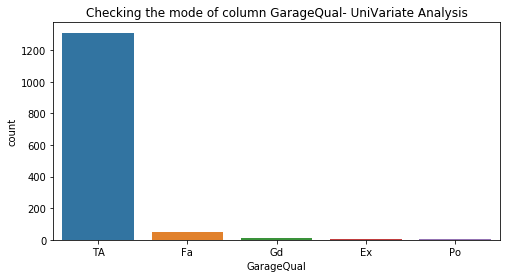

In [14]:
# Data imputation for column 'GarageQual'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.GarageQual)
plt.title("Checking the mode of column GarageQual- UniVariate Analysis")
plt.show()

In [15]:
df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [16]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].replace(np.nan,'TA')

In [17]:
#Checking the change
df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

### GarageFinish

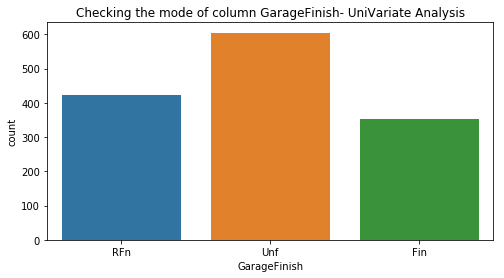

In [18]:
# Data imputation for column 'GarageFinish'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.GarageFinish)
plt.title("Checking the mode of column GarageFinish- UniVariate Analysis")
plt.show()

In [19]:
df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
#As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown
df_cleaned['GarageFinish']=df_cleaned['GarageFinish'].replace(np.nan,'Unknown')

In [21]:
#Checking the change
df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

### GarageType

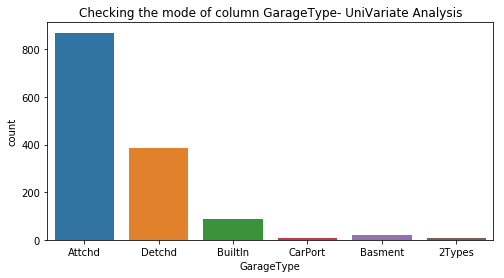

In [22]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.GarageType)
plt.title("Checking the mode of column GarageType- UniVariate Analysis")
plt.show()

In [23]:
df_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
df_cleaned['GarageType'] = df_cleaned['GarageType'].replace(np.nan,'Attchd')

In [25]:
#Checking the change
df_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

### GarageCond

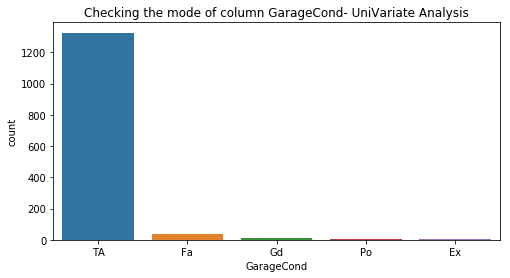

In [26]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.GarageCond)
plt.title("Checking the mode of column GarageCond- UniVariate Analysis")
plt.show()

In [27]:
df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [28]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].replace(np.nan,'TA')

In [29]:
#Checking the change
df_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

### BsmtFinType2

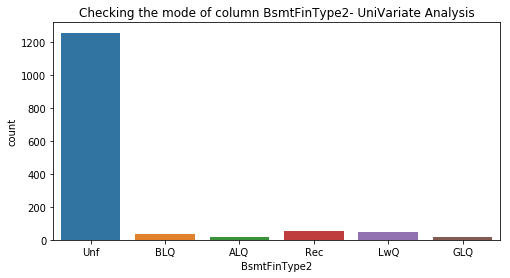

In [30]:
# Data imputation for column 'BsmtFinType2'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.BsmtFinType2)
plt.title("Checking the mode of column BsmtFinType2- UniVariate Analysis")
plt.show()

In [31]:
df_cleaned.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [32]:
# Most of the values is 'Unf' , so we can map the NAN values of 'BsmtFinType2' to 'Unf' -MODE
df_cleaned['BsmtFinType2'] = df_cleaned['BsmtFinType2'].replace(np.nan,'Unf')

In [33]:
#Checking the change
df_cleaned.BsmtFinType2.value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

### BsmtExposure

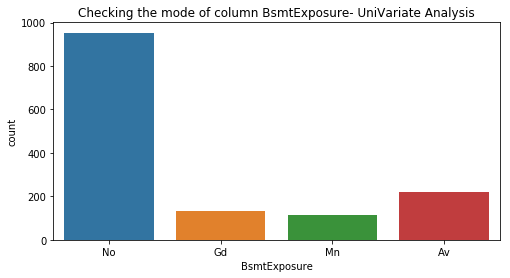

In [34]:
# Data imputation for column 'BsmtExposure'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.BsmtExposure)
plt.title("Checking the mode of column BsmtExposure- UniVariate Analysis")
plt.show()

In [35]:
df_cleaned.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [36]:
# Most of the values is 'No' , so we can map the NAN values of 'BsmtExposure' to 'No' -MODE
df_cleaned['BsmtExposure'] = df_cleaned['BsmtExposure'].replace(np.nan,'No')

In [37]:
#Checking the change
df_cleaned.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

### BsmtFinType1

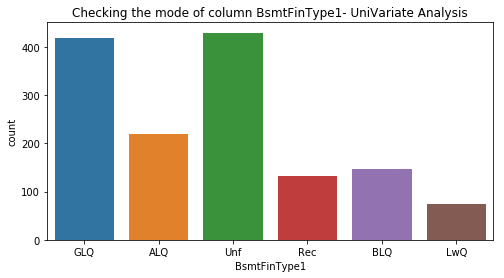

In [38]:
# Data imputation for column 'BsmtFinType1'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.BsmtFinType1)
plt.title("Checking the mode of column BsmtFinType1- UniVariate Analysis")
plt.show()

In [39]:
df_cleaned.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [40]:
#As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown
df_cleaned['BsmtFinType1']=df_cleaned['BsmtFinType1'].replace(np.nan,'Unknown')

In [41]:
#Checking the change
df_cleaned.BsmtFinType1.value_counts()

Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
Unknown     37
Name: BsmtFinType1, dtype: int64

### BsmtCond

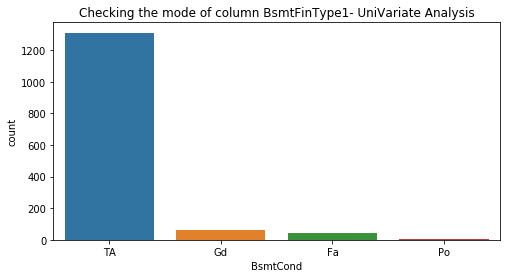

In [42]:
# Data imputation for column 'BsmtCond'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.BsmtCond)
plt.title("Checking the mode of column BsmtFinType1- UniVariate Analysis")
plt.show()

In [43]:
df_cleaned.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [44]:
# Most of the values is 'TA' , so we can map the NAN values of 'BsmtCond' to 'TA' -MODE
df_cleaned['BsmtCond'] = df_cleaned['BsmtCond'].replace(np.nan,'TA')

In [45]:
#Checking the change
df_cleaned.BsmtCond.value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

### BsmtQual

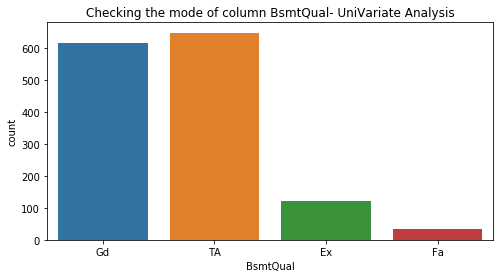

In [46]:
# Data imputation for column 'BsmtQual'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.BsmtQual)
plt.title("Checking the mode of column BsmtQual- UniVariate Analysis")
plt.show()

In [47]:
df_cleaned.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [48]:
#As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown
df_cleaned['BsmtQual']=df_cleaned['BsmtQual'].replace(np.nan,'Unknown')

In [49]:
#Checking the change
df_cleaned.BsmtQual.value_counts()

TA         649
Gd         618
Ex         121
Unknown     37
Fa          35
Name: BsmtQual, dtype: int64

### MasVnrType

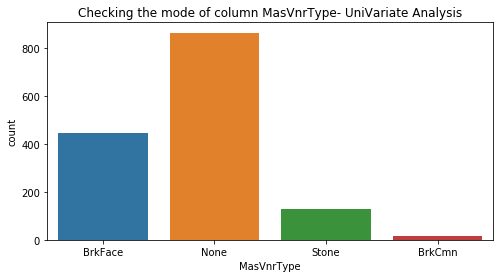

In [50]:
# Data imputation for column 'MasVnrType'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.MasVnrType)
plt.title("Checking the mode of column MasVnrType- UniVariate Analysis")
plt.show()

In [51]:
df_cleaned.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [52]:
# Most of the values is 'None' , so we can map the NAN values of 'MasVnrType' to 'None' -MODE
df_cleaned['MasVnrType'] = df_cleaned['MasVnrType'].replace(np.nan,'None')

In [53]:
#Checking the change
df_cleaned.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### Electrical

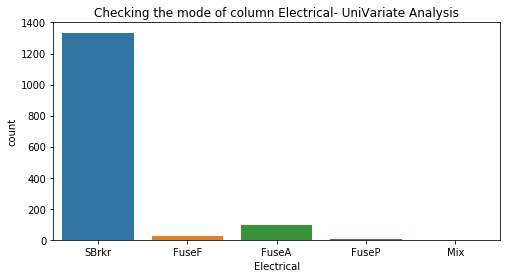

In [54]:
# Data imputation for column 'Electrical'

plt.figure(figsize=(8,4))
sns.countplot(df_cleaned.Electrical)
plt.title("Checking the mode of column Electrical- UniVariate Analysis")
plt.show()

In [55]:
df_cleaned.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [56]:
# Most of the values is 'SBrkr' , so we can map the NAN values of 'Electrical' to 'SBrkr' -MODE
df_cleaned['Electrical'] = df_cleaned['Electrical'].replace(np.nan,'SBrkr')

In [57]:
#Checking the change
df_cleaned.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Data Imputation for numerical columns

### LotFrontage

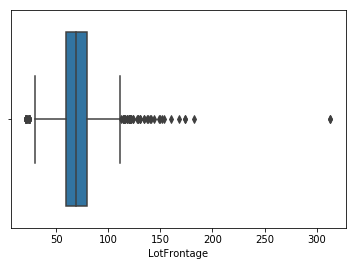

In [58]:
#PLots for outlier analysis of LotFrontage
sns.boxplot(df_cleaned.LotFrontage)
plt.show()

In [59]:
#As there are outliers, imputing with median
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(),inplace=True)

### GarageYrBlt

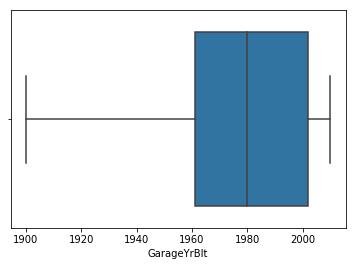

In [60]:
#PLots for outlier analysis of GarageYrBlt
sns.boxplot(df_cleaned.GarageYrBlt)
plt.show()

In [61]:
#There are no outiers so imputing missing values with mean
df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].mean(),inplace=True)

### MasVnrArea

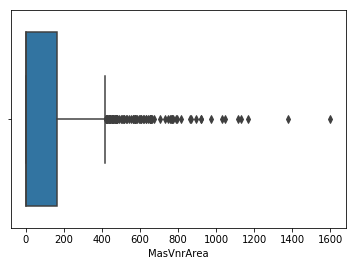

In [62]:
#PLots for outlier analysis of MasVnrArea
sns.boxplot(df_cleaned.MasVnrArea)
plt.show()

In [63]:
#As there are outliers, imputing with MasVnrArea
df_cleaned['MasVnrArea'].fillna(df_cleaned['MasVnrArea'].median(),inplace=True)

In [64]:
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0


### All missing values are handled.

## Data Exploration - EDA

In [65]:
df_cleaned.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
  

### Creating 2 variables 'Age' and 'AgeRemod'. 1st one is the age of the property at which it got sold and the 2nd one is the age of the property after remodification, at which it got sold.

In [66]:
df_cleaned['Age']=df_cleaned['YrSold']-df_cleaned['YearBuilt']
df_cleaned['AgeRemod']=df_cleaned['YrSold']-df_cleaned['YearRemodAdd']

In [67]:
#Dropping the row where 'AgeRemod' is less than 0
df_cleaned = df_cleaned[df_cleaned['AgeRemod'] >= 0]

In [68]:
#Dropping the 'Age' related variables which are not required
df_cleaned=df_cleaned.drop(['YrSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [69]:
#Dropping the id as it does not give any information
df_cleaned=df_cleaned.drop(['Id'], axis = 1) 

### Numerical Variables

In [70]:
numeric_feats = df_cleaned.dtypes[df_cleaned.dtypes != "object"].index
numeric_feats

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'TotRmsAbvGrd',
       u'Fireplaces', u'GarageYrBlt', u'GarageCars', u'GarageArea',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold', u'SalePrice',
       u'Age', u'AgeRemod'],
      dtype='object')

### Univariate Analysis

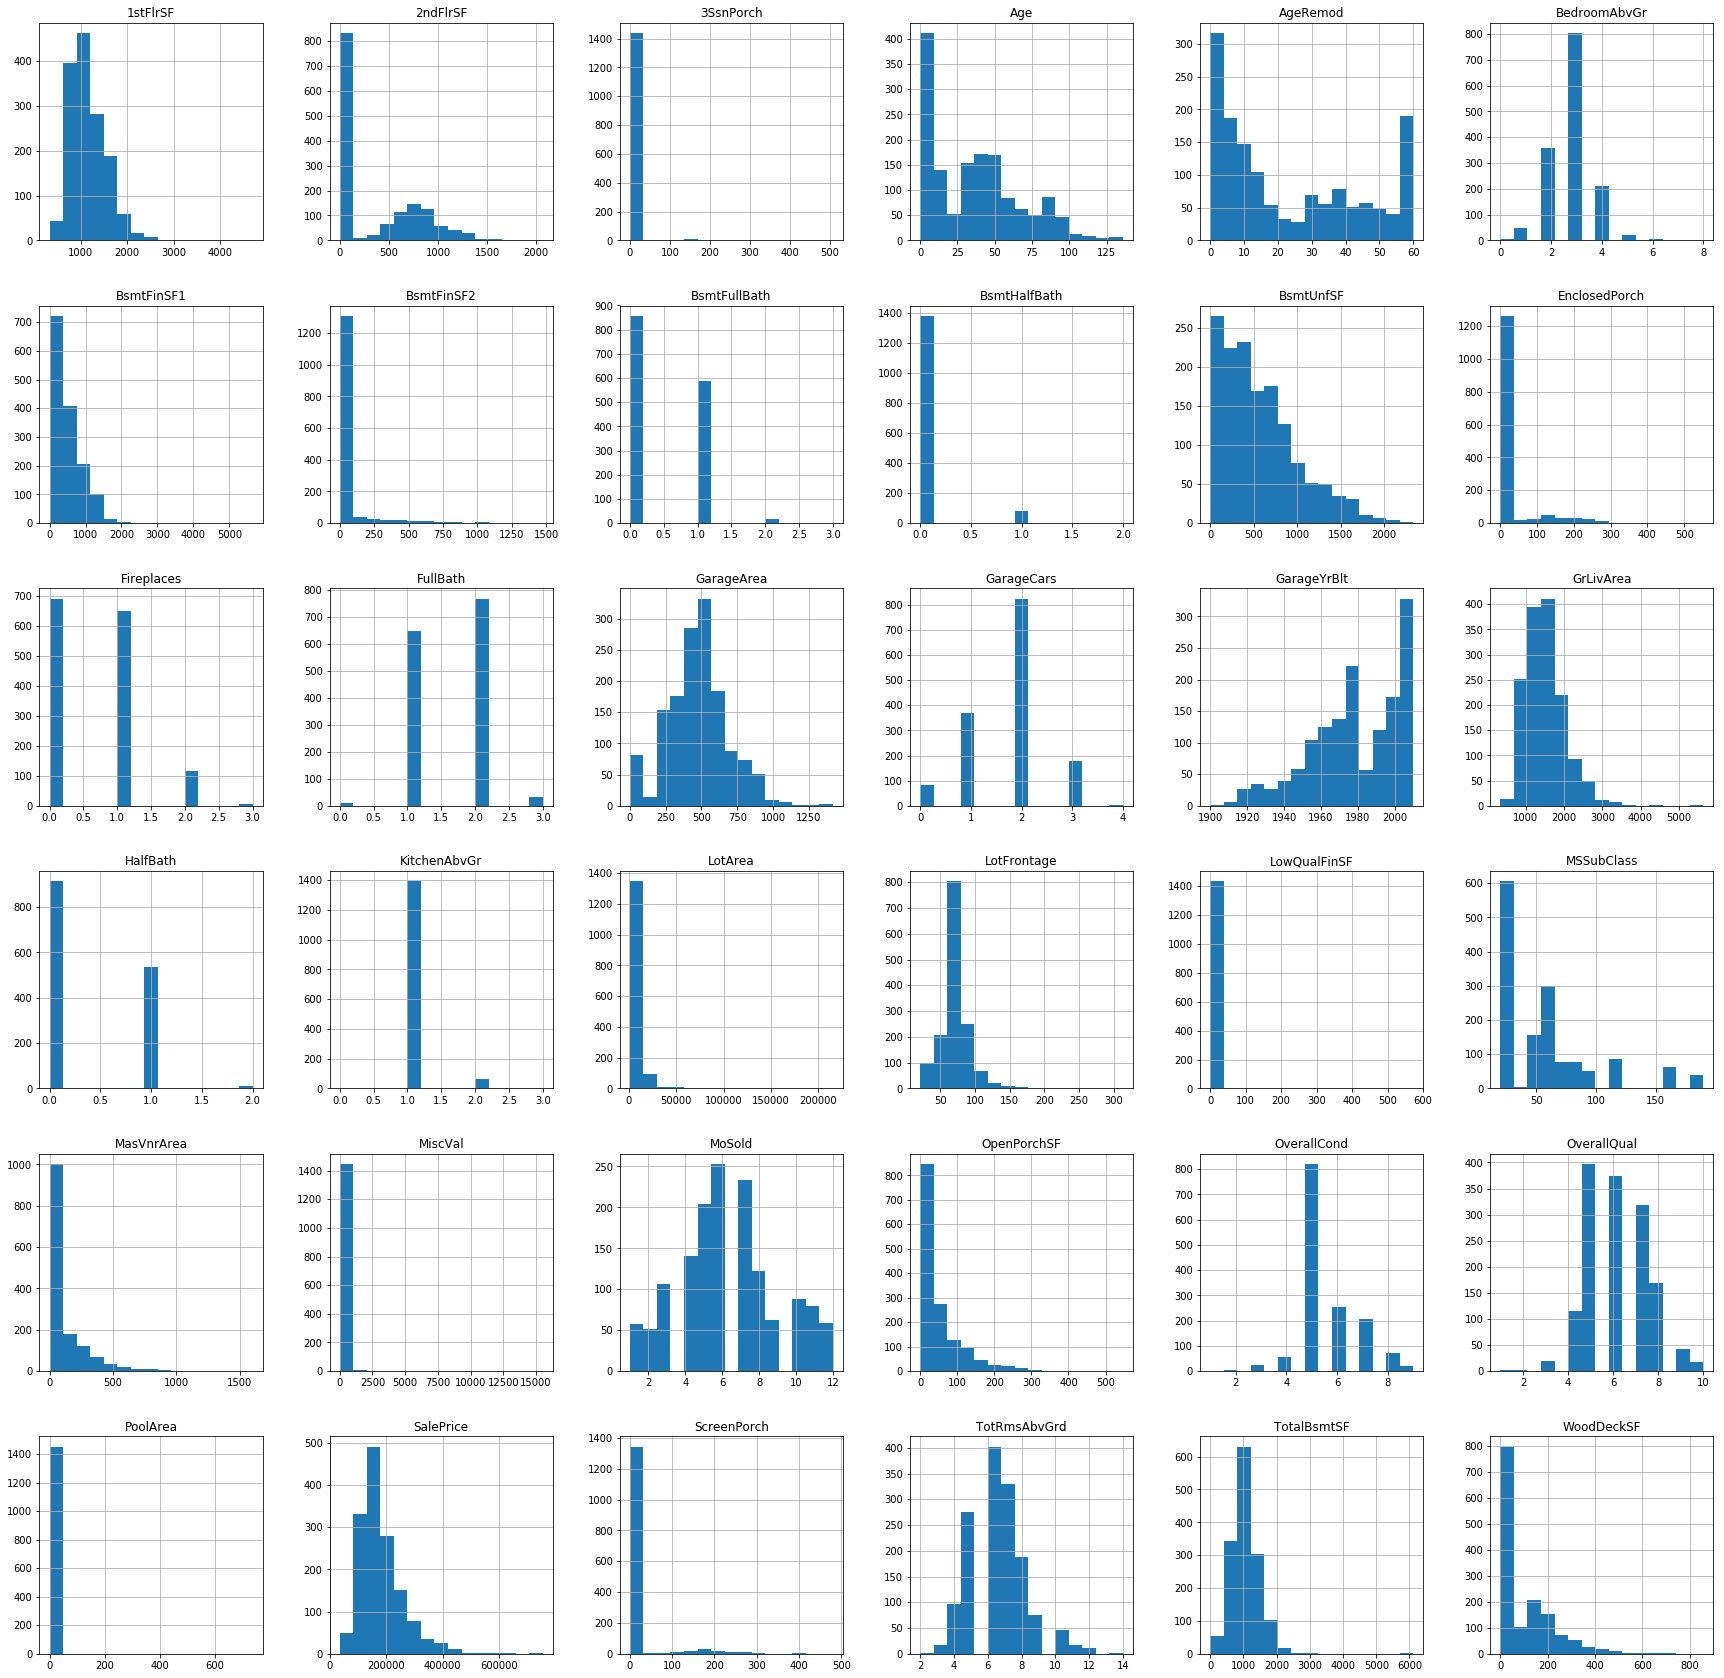

In [71]:
df_cleaned[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

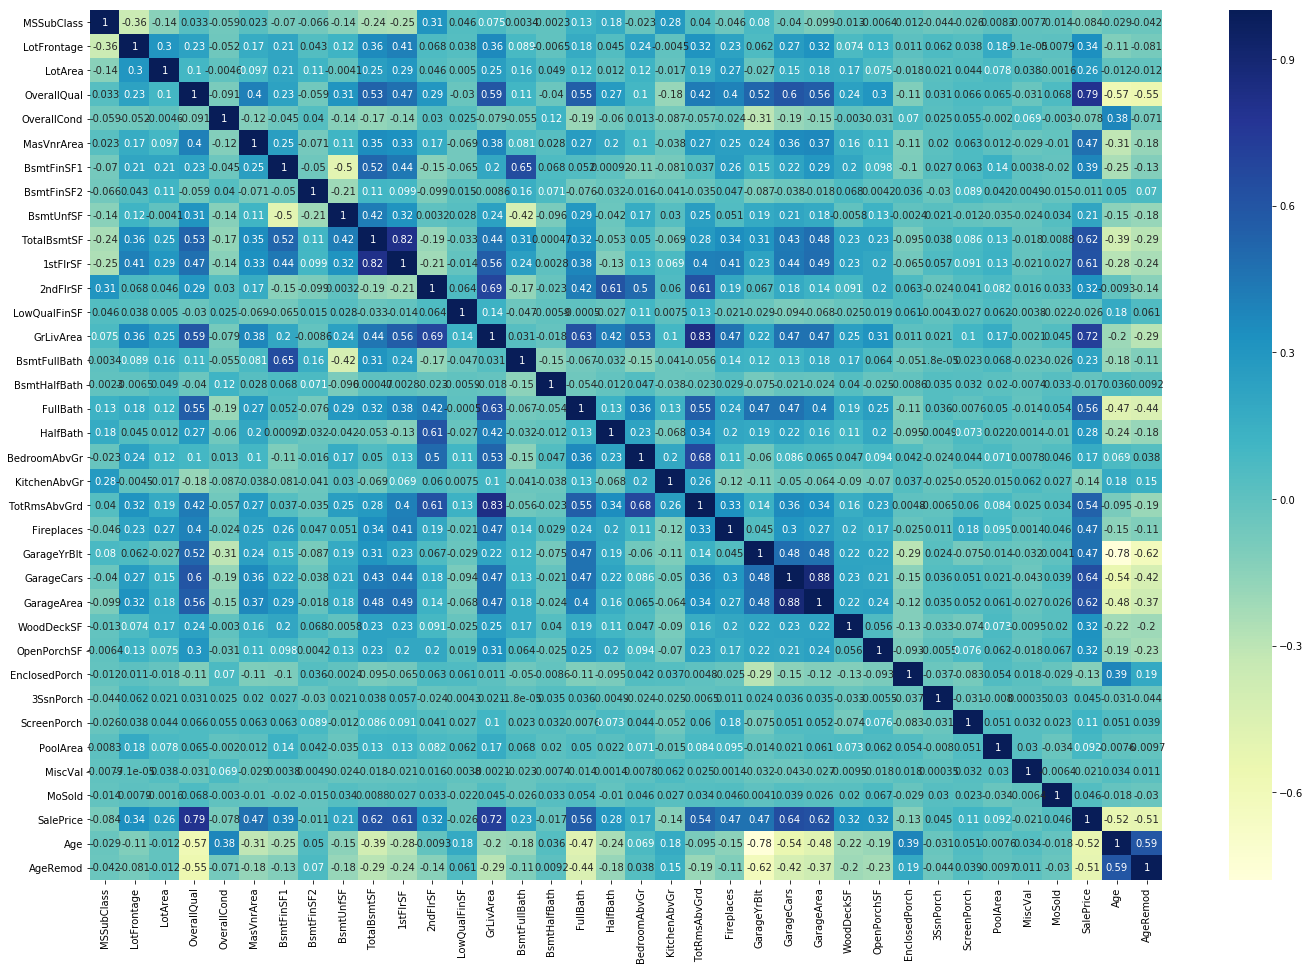

In [72]:
# correlation matrix
cor = df_cleaned.corr()

# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Inferences: Based on the correlation we can interpret the following:

SalePrice is very high positively correlated to: 
Overall Quality(0.79)
, 1stFlrSF (0.61)
, TotalBsmtSF (0.61)
, GrLivArea (0.71)
, FullBath(0.58)
, TotRmsAbvGrd(0.55)
, GarageCars(0.64)
, GarageAre(0.62)
, Age(-0.5)
, AgeRemod(-0.5)

### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

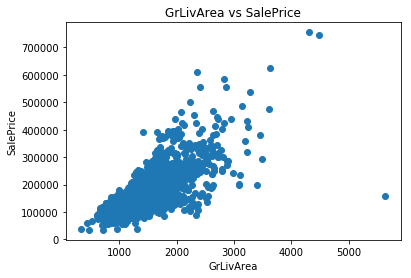

In [73]:
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

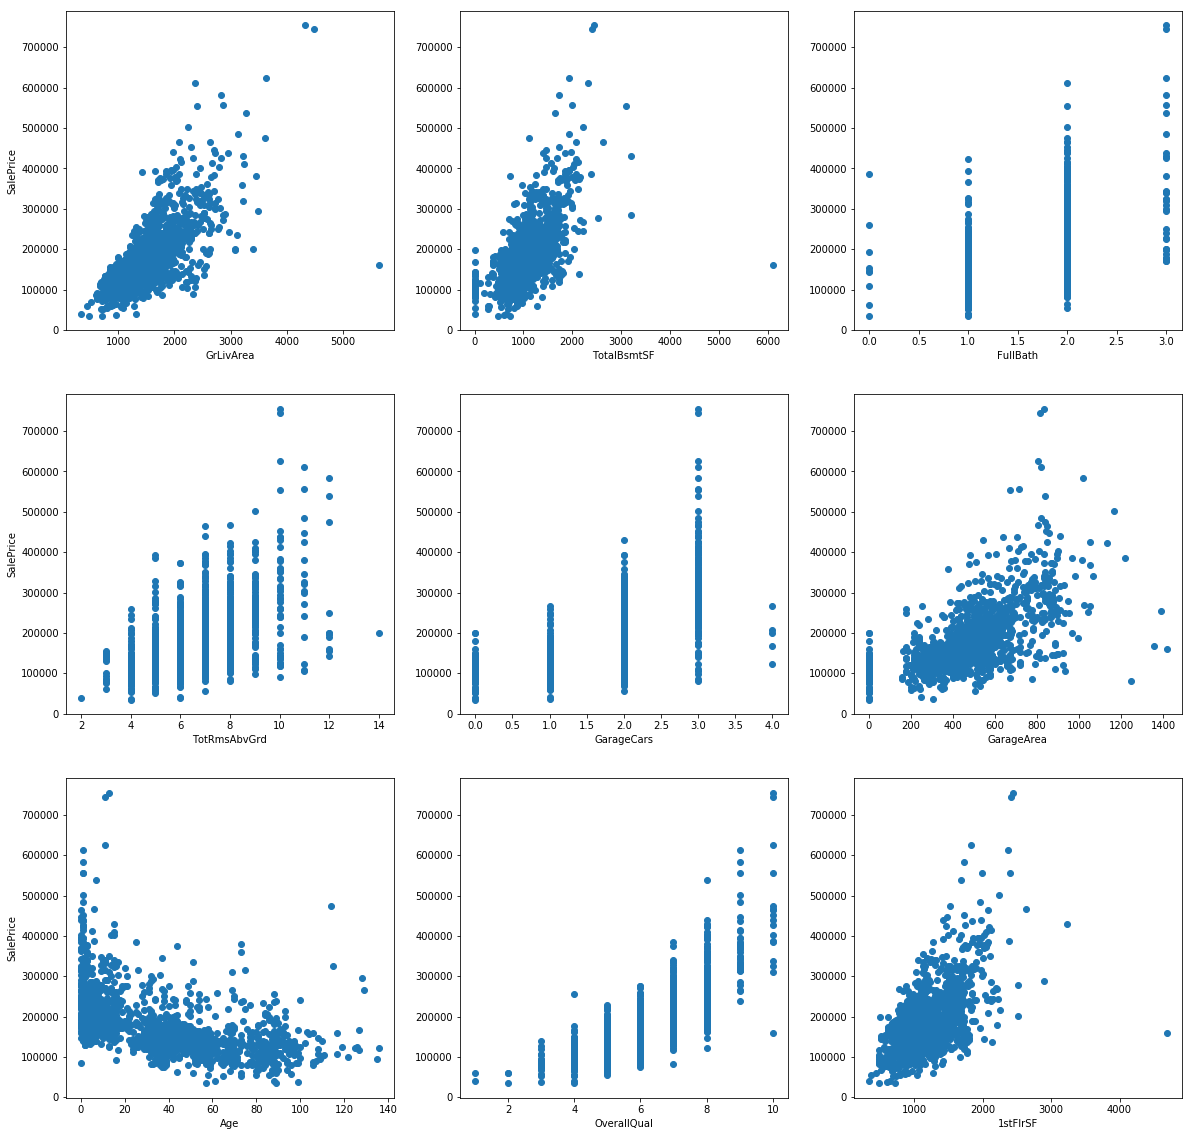

In [74]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(df_cleaned.TotalBsmtSF, df_cleaned.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(df_cleaned.FullBath, df_cleaned.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(df_cleaned.TotRmsAbvGrd, df_cleaned.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(df_cleaned.GarageCars, df_cleaned.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df_cleaned.GarageArea, df_cleaned.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(df_cleaned.Age, df_cleaned.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(df_cleaned.OverallQual, df_cleaned.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(df_cleaned['1stFlrSF'], df_cleaned.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

#### Inferences :

We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regression model.
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics.

### Categorical variables

In [75]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats 

Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond',
       u'PavedDrive', u'SaleType', u'SaleCondition'],
      dtype='object')

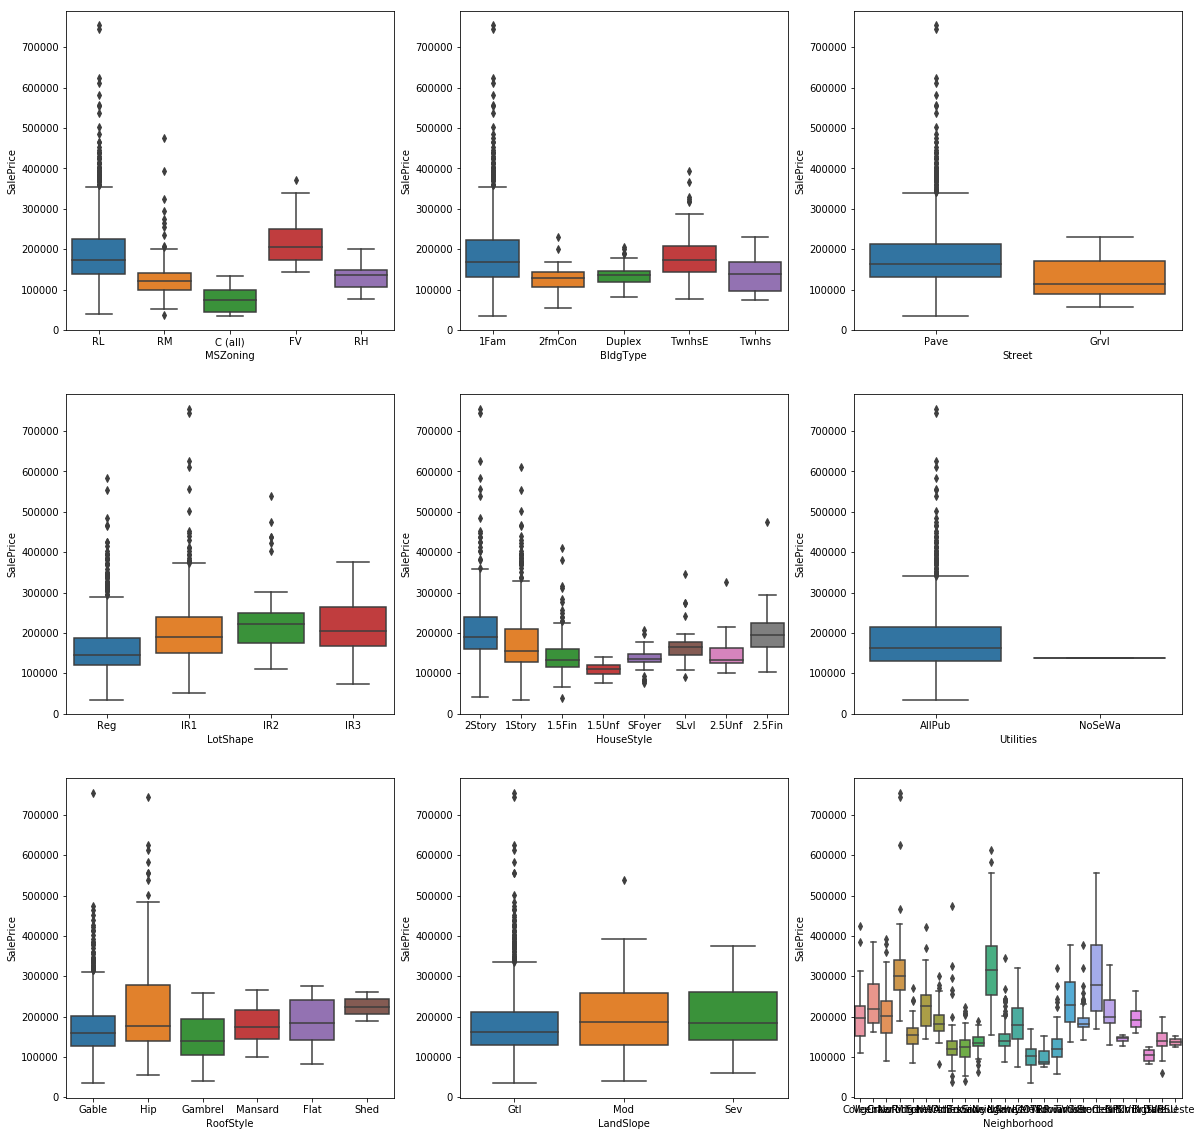

In [76]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df_cleaned)
plt.show()

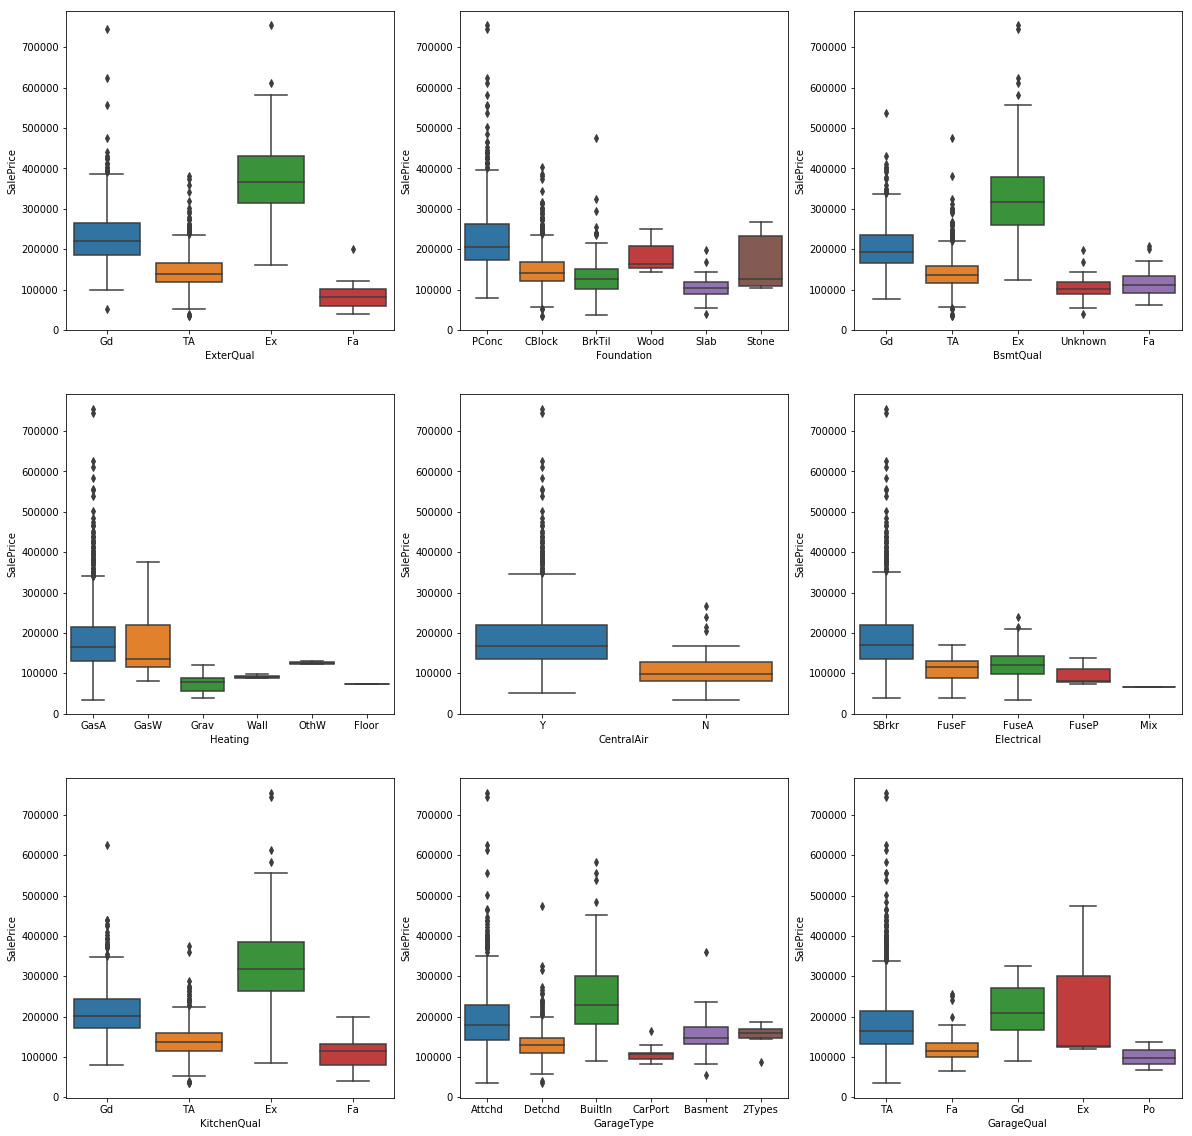

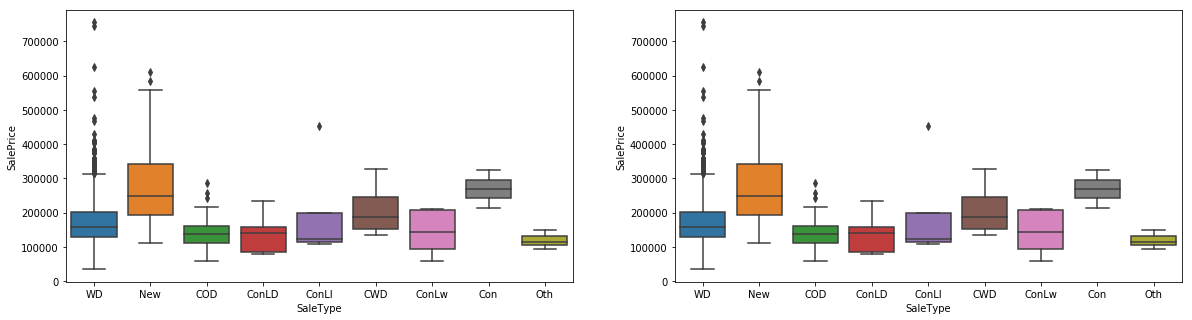

In [77]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df_cleaned)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.show()

### Inferences -

#### MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
#### The Street of type 'Pave' has more Sale Price when compared to 'Grvl' the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - It's not an important feature.
#### The house with Exterior Quality of type Execellent has the highest SalePrice.
#### The house with Basement Quality of type Execellent has the highest SalePrice.
#### The house with Kitchen Quality of type Execellent has the highest SalePrice.
#### The house with Garage Quality of type Execellent has the highest SalePrice.
#### The house with Garage Type of type BuiltIn has the highest SalePrice.
#### The house with Sale Type of type New has the highest SalePrice.
#### The Central air of type 'Yes' has more Sale Price when compared to 'No'

## Data Preprocessing - Transforming the Target variable (SalePrice)

### Target Variable

In [78]:
df_cleaned['SalePrice'].describe()

count      1459.000000
mean     180918.571624
std       79469.678565
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


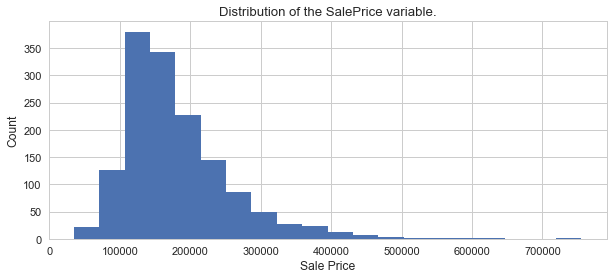

In [79]:
#Checking the distribution of 'SalePrice'
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 4]})
sns.distplot(df_cleaned['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180918.57 and sigma = 79442.44



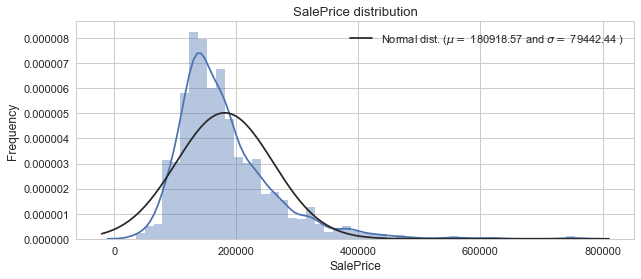

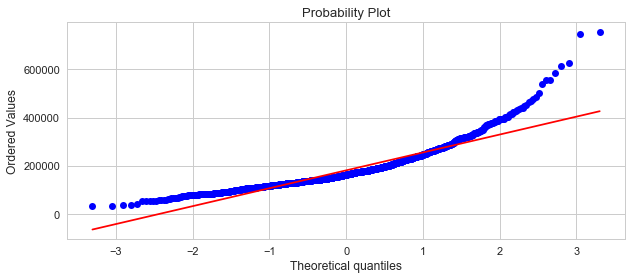

In [80]:
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

#### The target variable is right skewed. We need to transform this variable and make it normally distributed so using log transformation method.

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 12.02 and sigma = 0.40



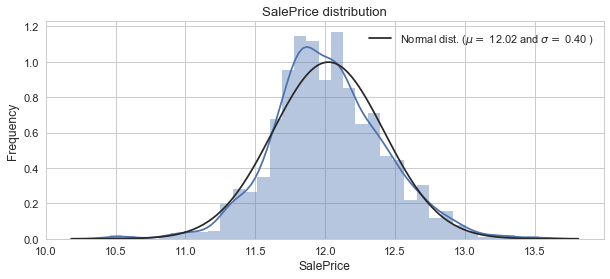

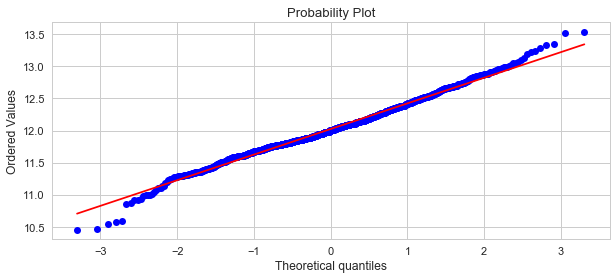

In [81]:
### Log-transformation of the target variable
#We use the numpy function log to all elements of the column
df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

## Data Preprocessing - Categorical Variables

In [82]:
df_cleaned.MSSubClass.value_counts()

20     536
60     298
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [83]:
#Changing the type of 'MSSubClass' and 'MoSold' as this is a categorical variable
df_cleaned['MSSubClass']=df_cleaned['MSSubClass'].astype('object')
df_cleaned['MoSold']=df_cleaned['MoSold'].astype('object')

In [84]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index([u'MSSubClass', u'MSZoning', u'Street', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'GarageType', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'PavedDrive', u'MoSold', u'SaleType', u'SaleCondition'],
      dtype='object')

In [85]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
AgeRemod,0,0.0
RoofMatl,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0


## Data Preprocessing - Dummy creation for remaining categorical variables

In [99]:
# Creating dummies
dummy = pd.get_dummies(df_cleaned[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
# Adding the results back to the cleaned dataframe
df_cleaned = pd.concat([df_cleaned, dummy], axis=1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [101]:
# Dropping the columns whose dummies have been created
df_cleaned=df_cleaned.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'], axis = 1)

In [102]:
df_cleaned.shape

(1459, 258)

In [103]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
SaleCondition_Partial,0,0.0
LandSlope_Mod,0,0.0
Condition1_RRAe,0,0.0
Condition1_PosN,0,0.0
Condition1_PosA,0,0.0
Condition1_Norm,0,0.0
Condition1_Feedr,0,0.0
Neighborhood_Veenker,0,0.0
Neighborhood_Timber,0,0.0
Neighborhood_StoneBr,0,0.0


## Data Modeling -Test Train splitting

In [148]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(df_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 258)
(438, 258)


In [149]:
y_train=house_train.pop('SalePrice')
X_train=house_train
y_test=house_test.pop('SalePrice')
X_test=house_test

## Data Modeling - Scaling

### Numerical Variables

In [150]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [151]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [152]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.304135,0.043042,0.568615,0.571621,0.065670,0.204673,0.034998,0.244803,0.334146,0.264178,...,0.002938,0.004897,0.086190,0.001959,0.862880,0.002938,0.007835,0.013712,0.819785,0.087169
std,0.128367,0.048731,0.155037,0.136920,0.116907,0.200748,0.120068,0.191422,0.133707,0.136703,...,0.054153,0.069842,0.280782,0.044237,0.344143,0.054153,0.088214,0.116350,0.384555,0.282221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.028784,0.444444,0.500000,0.000000,0.000000,0.000000,0.098459,0.248284,0.161290,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.298137,0.037863,0.555556,0.500000,0.000000,0.180073,0.000000,0.206336,0.314410,0.234409,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.360248,0.047683,0.666667,0.625000,0.100625,0.334552,0.000000,0.348459,0.414223,0.353763,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
985,0.291925,0.043987,0.444444,0.500,0.0,0.475320,0.000000,0.053082,0.363069,0.260215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1416,0.242236,0.046139,0.333333,0.625,0.0,0.000000,0.000000,0.332620,0.242358,0.289606,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
390,0.180124,0.032409,0.444444,0.875,0.0,0.110146,0.265265,0.098031,0.268559,0.187455,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
878,0.416149,0.048206,0.444444,0.750,0.0,0.410878,0.000000,0.089897,0.345914,0.256989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
568,0.360248,0.050756,0.777778,0.875,0.0,0.658592,0.000000,0.023545,0.466625,0.379211,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Data Modeling - RFE Technique

In [154]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
#Coefficients , intercepts
print(lm.coef_)
print(lm.intercept_)

[ 4.85570267e-02  8.01508034e-01  3.01034832e-01  2.86031771e-01
  3.44529450e-02  3.13908812e+11  2.11472390e+11  3.35142132e+11
 -4.59959621e+11 -2.09595226e+11 -1.55130517e+11 -3.86136009e+10
  3.03349650e+11  5.89294434e-02  9.84191895e-03  4.00469303e-02
  2.95715332e-02 -4.82482910e-02 -1.75617218e-01  3.69510651e-02
  7.24487305e-02 -2.00157166e-02  6.03852272e-02  1.68674469e-01
  7.88726807e-02  4.56905365e-02  5.36022186e-02  5.41057587e-02
  8.30397606e-02  1.04905128e-01  3.96809578e-02 -3.27177048e-01
 -5.31473160e-02 -6.26945496e-02  8.15105438e-02  1.56121254e-02
 -5.97381592e-03 -2.58178711e-02  5.04226685e-02 -1.17267609e-01
 -1.38107300e-01 -6.96105957e-02  1.01248746e+11 -3.88679504e-02
 -1.39402390e-01 -1.90830231e-01  3.95703352e+10  4.80220795e-01
  4.33755875e-01  4.67887878e-01  4.35184479e-01  1.77733421e-01
 -3.75843048e-03 -6.60705566e-03  1.48925781e-02  2.76393890e-02
  2.60162354e-03  3.13796997e-02 -2.48161852e-01  3.18450928e-02
 -3.71685028e-02 -3.56101

In [156]:
# Import RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 30)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[False  True  True  True False  True False False  True False False False
  True False False False False False  True False False False False  True
 False False False False False False False  True False False False False
 False False False False False False False False  True False False  True
  True  True  True False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False  True
 False  True  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [157]:
col = X_train.columns[rfe.support_]
col

Index([u'LotArea', u'OverallQual', u'OverallCond', u'BsmtFinSF1',
       u'TotalBsmtSF', u'GrLivArea', u'KitchenAbvGr', u'GarageArea', u'Age',
       u'MSSubClass_160', u'MSZoning_FV', u'MSZoning_RH', u'MSZoning_RL',
       u'MSZoning_RM', u'LandSlope_Sev', u'Neighborhood_Crawfor',
       u'Condition1_RRAe', u'Condition2_RRAe', u'RoofStyle_Shed',
       u'RoofMatl_Membran', u'RoofMatl_Metal', u'Exterior1st_BrkComm',
       u'Foundation_Wood', u'Heating_GasA', u'Heating_GasW', u'Heating_Wall',
       u'Functional_Maj2', u'Functional_Sev', u'SaleType_Con',
       u'SaleType_Oth'],
      dtype='object')

In [158]:
# Features which can be excluded according to RFE
X_train.columns[~rfe.support_]

Index([u'LotFrontage', u'MasVnrArea', u'BsmtFinSF2', u'BsmtUnfSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'BsmtFullBath', u'BsmtHalfBath',
       u'FullBath',
       ...
       u'SaleType_ConLD', u'SaleType_ConLI', u'SaleType_ConLw',
       u'SaleType_New', u'SaleType_WD', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=227)

## Backward stepwise approach (Manual Elimination)
#### Function to build the LR model and calculate VIFs

In [159]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
#     vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [160]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index([u'LotArea', u'OverallQual', u'OverallCond', u'BsmtFinSF1',
       u'TotalBsmtSF', u'GrLivArea', u'KitchenAbvGr', u'GarageArea', u'Age',
       u'MSSubClass_160', u'MSZoning_FV', u'MSZoning_RH', u'MSZoning_RL',
       u'MSZoning_RM', u'LandSlope_Sev', u'Neighborhood_Crawfor',
       u'Condition1_RRAe', u'Condition2_RRAe', u'RoofStyle_Shed',
       u'RoofMatl_Membran', u'RoofMatl_Metal', u'Exterior1st_BrkComm',
       u'Foundation_Wood', u'Heating_GasA', u'Heating_GasW', u'Heating_Wall',
       u'Functional_Maj2', u'Functional_Sev', u'SaleType_Con',
       u'SaleType_Oth'],
      dtype='object')

In [161]:
# Taking 30 columns supported by RFE for regression
X_train_rfe = X_train[['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con',
       'SaleType_Oth']]

In [162]:
X_train_rfe.shape

(1021, 30)

# Model Building
## Model 1: All variables post RFE

In [163]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con',
       'SaleType_Oth']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     416.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:07:41   Log-Likelihood:                 804.53
No. Observations:                1021   AIC:                            -1547.
Df Residuals:                     990   BIC:                            -1394.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.3687 

## Model 2: Removing variable 'SaleType_Con'

In [164]:
# Dropping the variable 'SaleType_Con' as it has high p-value
cols = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev',
       'SaleType_Oth']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     429.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:09:19   Log-Likelihood:                 803.21
No. Observations:                1021   AIC:                            -1546.
Df Residuals:                     991   BIC:                            -1399.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.3685 

## Model 3: Removing variable 'Heating_GasA'

In [165]:
# Dropping the variable 'Heating_GasA' as it has high VIF
cols = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_GasW', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev',
       'SaleType_Oth']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     432.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:10:43   Log-Likelihood:                 789.23
No. Observations:                1021   AIC:                            -1520.
Df Residuals:                     992   BIC:                            -1378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5649 

## Model 4: Removing variable 'Heating_GasW'

In [166]:
# Dropping the variable 'Heating_GasW' as it has high p-value
cols = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev',
       'SaleType_Oth']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     447.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:11:24   Log-Likelihood:                 787.79
No. Observations:                1021   AIC:                            -1520.
Df Residuals:                     993   BIC:                            -1382.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5697 

## Model 5: Removing variable 'OverallQual'

In [167]:
# Dropping the variable 'OverallQual' as it has high VIF
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev',
       'SaleType_Oth']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:12:15   Log-Likelihood:                 658.53
No. Observations:                1021   AIC:                            -1263.
Df Residuals:                     994   BIC:                            -1130.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7679 

## Model 6: Removing variable 'SaleType_Oth'

In [168]:
# Dropping the variable 'SaleType_Oth' as it has high p-value
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Heating_Wall',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     366.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:16:52   Log-Likelihood:                 657.87
No. Observations:                1021   AIC:                            -1264.
Df Residuals:                     995   BIC:                            -1136.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7693 

## Model 7: Removing variable 'Heating_Wall'

In [169]:
# Dropping the variable 'Heating_Wall' as it has high p-value
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     381.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:19:08   Log-Likelihood:                 656.41
No. Observations:                1021   AIC:                            -1263.
Df Residuals:                     996   BIC:                            -1140.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7722 

## Model 8: Removing variable 'MSZoning_RL'

In [170]:
# Dropping the variable 'MSZoning_RL' as it has high VIF
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     371.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:21:16   Log-Likelihood:                 624.23
No. Observations:                1021   AIC:                            -1200.
Df Residuals:                     997   BIC:                            -1082.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1579 

## Model 9: Removing variable 'MSZoning_RM'

In [171]:
# Dropping the variable 'MSZoning_RM' as it has high p-value
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     388.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:21:52   Log-Likelihood:                 624.21
No. Observations:                1021   AIC:                            -1202.
Df Residuals:                     998   BIC:                            -1089.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1581 

## Model 10: Removing variable 'MSZoning_RH'

In [172]:
# Dropping the variable 'MSZoning_RH' as it has high p-value
cols = ['LotArea', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV',
       'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     407.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:22:25   Log-Likelihood:                 623.82
No. Observations:                1021   AIC:                            -1204.
Df Residuals:                     999   BIC:                            -1095.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1573 

## Model 11: Removing variable 'OverallCond'

In [173]:
# Dropping the variable 'OverallCond' as it has high VIF
cols = ['LotArea', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV',
       'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     347.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:22:52   Log-Likelihood:                 530.30
No. Observations:                1021   AIC:                            -1019.
Df Residuals:                    1000   BIC:                            -915.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4022 

## Model 12: Removing variable 'TotalBsmtSF'

In [174]:
# Dropping the variable 'TotalBsmtSF' as it has high VIF
cols = ['LotArea', 'BsmtFinSF1',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Age',
       'MSSubClass_160', 'MSZoning_FV',
       'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'Exterior1st_BrkComm',
       'Foundation_Wood',
       'Functional_Maj2', 'Functional_Sev']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:23:39   Log-Likelihood:                 472.63
No. Observations:                1021   AIC:                            -905.3
Df Residuals:                    1001   BIC:                            -806.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5081 

### The Linear regression model built with 30 columns selected by RFE technique is further reduced in terms of columns to 19. The R-squared is 85.9% and Adjusted R-squared is 85.7% which is quite good.

In [175]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[cols]
X_test = X_test[cols]

In [176]:
X_train.shape

(1021, 19)

## Data Modeling - Advanced Regression

## Ridge Regression

In [177]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8592771062654834


#### Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [178]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [179]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0032,0.0008,-0.117161,-0.110757,0.001,{u'alpha': 0.001},4,-0.125034,-0.107498,-0.111386,...,-0.112240,-0.112066,-0.110625,-0.112217,-0.126482,-0.108283,0.003311,0.0016,0.007060,0.002424
1,0.0014,0.0000,-0.117127,-0.110781,0.01,{u'alpha': 0.01},3,-0.124915,-0.107543,-0.111280,...,-0.112190,-0.112083,-0.110691,-0.112254,-0.126522,-0.108299,0.002800,0.0000,0.007056,0.002417
2,0.0032,0.0000,-0.116606,-0.112063,0.5,{u'alpha': 0.5},1,-0.124785,-0.109318,-0.107898,...,-0.110651,-0.113227,-0.111648,-0.113562,-0.128007,-0.109555,0.003919,0.0000,0.008158,0.002197
3,0.0062,0.0000,-0.116988,-0.113033,1,{u'alpha': 1.0},2,-0.126779,-0.110283,-0.106583,...,-0.110298,-0.114268,-0.111755,-0.114541,-0.129477,-0.110660,0.007600,0.0000,0.009298,0.002129
4,0.0026,0.0000,-0.137644,-0.135699,10,{u'alpha': 10.0},5,-0.151704,-0.132878,-0.123058,...,-0.127594,-0.137706,-0.127046,-0.136464,-0.158746,-0.133320,0.005200,0.0000,0.014622,0.002197
5,0.0004,0.0000,-0.201069,-0.200179,50,{u'alpha': 50},6,-0.219460,-0.197340,-0.191377,...,-0.190196,-0.202238,-0.177215,-0.203286,-0.227007,-0.195926,0.000800,0.0000,0.018932,0.002958
6,0.0048,0.0030,-0.236910,-0.236237,100,{u'alpha': 100},7,-0.257743,-0.232985,-0.229434,...,-0.224280,-0.238425,-0.211023,-0.240645,-0.261967,-0.231534,0.006177,0.0060,0.019737,0.003428
7,0.0028,0.0000,-0.293463,-0.292917,500,{u'alpha': 500},8,-0.317498,-0.287896,-0.287657,...,-0.279526,-0.295830,-0.267596,-0.298862,-0.314918,-0.287926,0.002926,0.0000,0.019677,0.004365
8,0.0036,0.0000,-0.304065,-0.303510,1000,{u'alpha': 1000},9,-0.328580,-0.298095,-0.298407,...,-0.290424,-0.306524,-0.277891,-0.309792,-0.324900,-0.298444,0.004409,0.0000,0.019694,0.004581


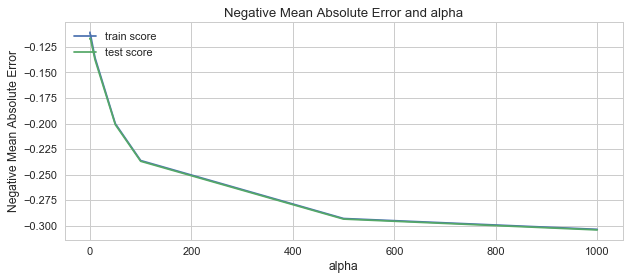

In [180]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### We se that alpha is somewhere between 0- 20 So sleting parameters according to that.

In [181]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [182]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0056,0.0026,-0.117161,-0.110757,0.001,{u'alpha': 0.001},3,-0.125034,-0.107498,-0.111386,...,-0.112240,-0.112066,-0.110625,-0.112217,-0.126482,-0.108283,0.005852,0.003323,0.007060,0.002424
1,0.0034,0.0000,-0.117127,-0.110781,0.01,{u'alpha': 0.01},2,-0.124915,-0.107543,-0.111280,...,-0.112190,-0.112083,-0.110691,-0.112254,-0.126522,-0.108299,0.002577,0.000000,0.007056,0.002417
2,0.0012,0.0018,-0.116988,-0.113033,1,{u'alpha': 1.0},1,-0.126779,-0.110283,-0.106583,...,-0.110298,-0.114268,-0.111755,-0.114541,-0.129477,-0.110660,0.001470,0.003600,0.009298,0.002129
3,0.0000,0.0032,-0.118630,-0.115105,2,{u'alpha': 2.0},4,-0.129538,-0.112417,-0.106597,...,-0.110906,-0.116452,-0.112660,-0.116436,-0.133393,-0.112918,0.000000,0.006400,0.010743,0.002021
4,0.0096,0.0000,-0.120568,-0.117406,3,{u'alpha': 3.0},5,-0.132589,-0.114615,-0.107564,...,-0.111881,-0.118981,-0.113783,-0.118629,-0.136964,-0.115242,0.005817,0.000000,0.011866,0.002055
5,0.0022,0.0034,-0.122822,-0.119958,4,{u'alpha': 4.0},6,-0.135700,-0.117207,-0.109133,...,-0.113303,-0.121735,-0.115627,-0.121012,-0.140283,-0.117817,0.004400,0.006312,0.012653,0.002032
6,0.0072,0.0002,-0.125292,-0.122615,5,{u'alpha': 5.0},7,-0.138606,-0.119830,-0.111185,...,-0.115524,-0.124483,-0.117539,-0.123536,-0.143540,-0.120431,0.003059,0.000400,0.013152,0.002079
7,0.0034,0.0004,-0.127711,-0.125283,6,{u'alpha': 6.0},8,-0.141285,-0.122477,-0.113177,...,-0.117848,-0.127146,-0.119495,-0.126122,-0.146681,-0.123128,0.000490,0.000800,0.013566,0.002087
8,0.0038,0.0006,-0.130191,-0.127965,7,{u'alpha': 7.0},9,-0.143949,-0.125150,-0.115577,...,-0.120179,-0.129880,-0.121412,-0.128762,-0.149771,-0.125808,0.000748,0.000800,0.013882,0.002096
9,0.0062,0.0010,-0.132681,-0.130615,8,{u'alpha': 8.0},10,-0.146491,-0.127797,-0.118202,...,-0.122651,-0.132593,-0.123298,-0.131407,-0.152696,-0.128388,0.003544,0.002000,0.014068,0.002127


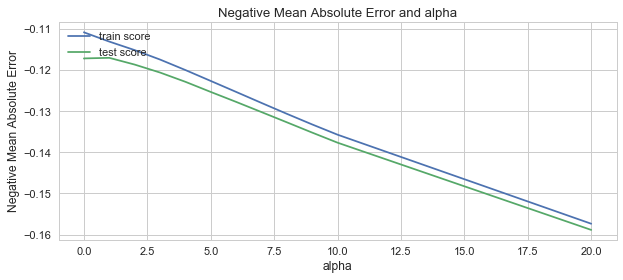

In [183]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [184]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
 The best r2 score is obtained at alpha 1.0


### Building ridge regression model with optimal alpha value

In [185]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [186]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [187]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,11.531662,11.531662
3,OverallCond,1.589462,1.589462
6,BsmtFinSF2,-0.659275,0.659275
5,BsmtFinSF1,0.525709,0.525709
1,LotArea,0.474069,0.474069
4,MasVnrArea,-0.415873,0.415873
16,HalfBath,-0.373872,0.373872
2,OverallQual,0.310014,0.310014
19,TotRmsAbvGrd,-0.307233,0.307233
14,BsmtHalfBath,0.289092,0.289092


In [188]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

('Ridge regression train r2: ', 0.8539)
('Ridge regression test r2: ', 0.6526)


## Lasso Regression model

In [191]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [192]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0012,0.0020,-0.117010,-0.111466,0.0001,{u'alpha': 0.0001},1,-0.124574,-0.108468,-0.110460,...,-0.111518,-0.112679,-0.112237,-0.113054,-0.126225,-0.108839,1.939118e-03,0.0040,0.006900,0.002360
1,0.0014,0.0000,-0.119013,-0.116223,0.001,{u'alpha': 0.001},2,-0.128005,-0.113140,-0.110072,...,-0.110390,-0.118193,-0.114560,-0.117091,-0.131993,-0.114004,4.899403e-04,0.0000,0.009203,0.002242
2,0.0010,0.0000,-0.144185,-0.143376,0.01,{u'alpha': 0.01},3,-0.160337,-0.140669,-0.132532,...,-0.131469,-0.145489,-0.127579,-0.144768,-0.168926,-0.141757,1.168008e-07,0.0000,0.017006,0.001845
3,0.0008,0.0002,-0.305351,-0.304849,0.05,{u'alpha': 0.05},4,-0.334676,-0.303674,-0.298206,...,-0.287794,-0.304650,-0.278591,-0.310819,-0.327345,-0.301210,3.999949e-04,0.0004,0.022004,0.003200
4,0.0002,0.0000,-0.315883,-0.315337,0.1,{u'alpha': 0.1},5,-0.340953,-0.309455,-0.310483,...,-0.302490,-0.318525,-0.289333,-0.321965,-0.336032,-0.310178,3.999710e-04,0.0000,0.019744,0.004833


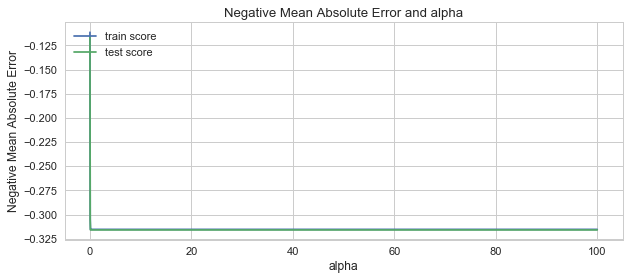

In [193]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [195]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [196]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0014,0.0000,-0.119013,-0.116223,0.001,{u'alpha': 0.001},1,-0.128005,-0.113140,-0.110072,...,-0.110390,-0.118193,-0.114560,-0.117091,-0.131993,-0.114004,0.001020,0.0000,0.009203,0.002242
1,0.0020,0.0000,-0.144185,-0.143376,0.01,{u'alpha': 0.01},2,-0.160337,-0.140669,-0.132532,...,-0.131469,-0.145489,-0.127579,-0.144768,-0.168926,-0.141757,0.004000,0.0000,0.017006,0.001845
2,0.0034,0.0000,-0.305351,-0.304849,0.05,{u'alpha': 0.05},3,-0.334676,-0.303674,-0.298206,...,-0.287794,-0.304650,-0.278591,-0.310819,-0.327345,-0.301210,0.005851,0.0000,0.022004,0.003200
3,0.0008,0.0002,-0.315883,-0.315337,0.1,{u'alpha': 0.1},4,-0.340953,-0.309455,-0.310483,...,-0.302490,-0.318525,-0.289333,-0.321965,-0.336032,-0.310178,0.000400,0.0004,0.019744,0.004833
4,0.0008,0.0002,-0.315883,-0.315337,0.2,{u'alpha': 0.2},4,-0.340953,-0.309455,-0.310483,...,-0.302490,-0.318525,-0.289333,-0.321965,-0.336032,-0.310178,0.000400,0.0004,0.019744,0.004833


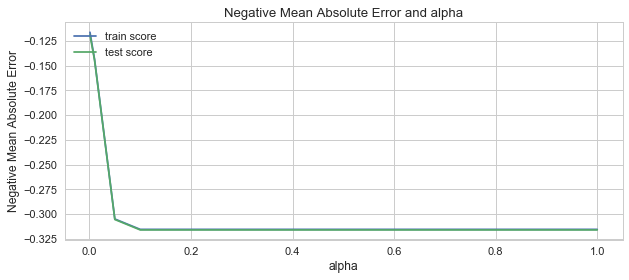

In [197]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [198]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [199]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [200]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0008,0.0002,-0.117010,-0.111466,0.0001,{u'alpha': 0.0001},1,-0.124574,-0.108468,-0.110460,...,-0.111518,-0.112679,-0.112237,-0.113054,-0.126225,-0.108839,0.001166,0.0004,0.006900,0.002360
1,0.0006,0.0000,-0.119013,-0.116223,0.001,{u'alpha': 0.001},2,-0.128005,-0.113140,-0.110072,...,-0.110390,-0.118193,-0.114560,-0.117091,-0.131993,-0.114004,0.001200,0.0000,0.009203,0.002242
2,0.0038,0.0000,-0.144185,-0.143376,0.01,{u'alpha': 0.01},3,-0.160337,-0.140669,-0.132532,...,-0.131469,-0.145489,-0.127579,-0.144768,-0.168926,-0.141757,0.005115,0.0000,0.017006,0.001845
3,0.0010,0.0000,-0.305351,-0.304849,0.05,{u'alpha': 0.05},4,-0.334676,-0.303674,-0.298206,...,-0.287794,-0.304650,-0.278591,-0.310819,-0.327345,-0.301210,0.000632,0.0000,0.022004,0.003200
4,0.0012,0.0002,-0.315883,-0.315337,0.1,{u'alpha': 0.1},5,-0.340953,-0.309455,-0.310483,...,-0.302490,-0.318525,-0.289333,-0.321965,-0.336032,-0.310178,0.000400,0.0004,0.019744,0.004833


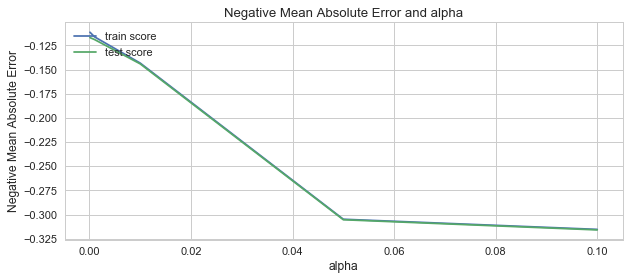

In [201]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [202]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [203]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0004,0.0000,-0.117029,-0.110802,1e-05,{u'alpha': 1e-05},2,-0.124935,-0.107566,-0.111303,...,-0.112172,-0.112104,-0.110752,-0.112278,-0.125944,-0.108321,0.0008,0.0000,0.006897,0.002414
1,0.0000,0.0000,-0.117010,-0.111466,0.0001,{u'alpha': 0.0001},1,-0.124574,-0.108468,-0.110460,...,-0.111518,-0.112679,-0.112237,-0.113054,-0.126225,-0.108839,0.0000,0.0000,0.006900,0.002360
2,0.0000,0.0000,-0.119013,-0.116223,0.001,{u'alpha': 0.001},3,-0.128005,-0.113140,-0.110072,...,-0.110390,-0.118193,-0.114560,-0.117091,-0.131993,-0.114004,0.0000,0.0000,0.009203,0.002242
3,0.0030,0.0000,-0.144185,-0.143376,0.01,{u'alpha': 0.01},4,-0.160337,-0.140669,-0.132532,...,-0.131469,-0.145489,-0.127579,-0.144768,-0.168926,-0.141757,0.0060,0.0000,0.017006,0.001845
4,0.0000,0.0018,-0.305351,-0.304849,0.05,{u'alpha': 0.05},5,-0.334676,-0.303674,-0.298206,...,-0.287794,-0.304650,-0.278591,-0.310819,-0.327345,-0.301210,0.0000,0.0036,0.022004,0.003200


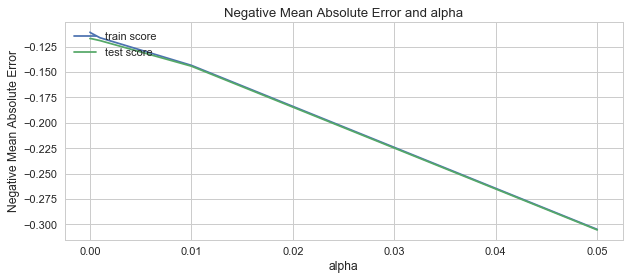

In [204]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [205]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [206]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [207]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0008,0.0004,-0.117029,-0.110802,1e-05,{u'alpha': 1e-05},2,-0.124935,-0.107566,-0.111303,...,-0.112172,-0.112104,-0.110752,-0.112278,-0.125944,-0.108321,0.001166,0.00080,0.006897,0.002414
1,0.0026,0.0002,-0.117010,-0.111466,0.0001,{u'alpha': 0.0001},1,-0.124574,-0.108468,-0.110460,...,-0.111518,-0.112679,-0.112237,-0.113054,-0.126225,-0.108839,0.003200,0.00040,0.006900,0.002360
2,0.0008,0.0006,-0.119013,-0.116223,0.001,{u'alpha': 0.001},3,-0.128005,-0.113140,-0.110072,...,-0.110390,-0.118193,-0.114560,-0.117091,-0.131993,-0.114004,0.000400,0.00049,0.009203,0.002242


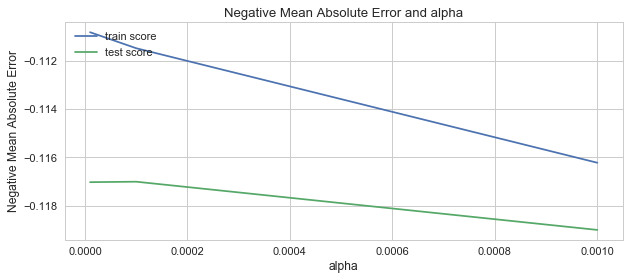

In [208]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [209]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Building Lasso regression model with optimal alpha value

In [210]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

('Lasso Regression train r2:', 0.8582083083917245)
('Lasso Regression test r2:', 0.6395848678527031)


In [211]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [212]:
lasso_coef

,Feature,Coef,mod
0,LotArea,11.512076,11.512076
1,BsmtFinSF1,0.712830,0.712830
2,GrLivArea,0.301547,0.301547
3,KitchenAbvGr,1.692021,1.692021
4,GarageArea,-0.451485,0.451485
5,Age,0.488475,0.488475
6,MSSubClass_160,-0.664558,0.664558
7,MSZoning_FV,-0.174632,0.174632
8,LandSlope_Sev,0.056806,0.056806
9,Neighborhood_Crawfor,-0.220039,0.220039


In [213]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotArea,11.512076,11.512076
3,KitchenAbvGr,1.692021,1.692021
1,BsmtFinSF1,0.712830,0.712830
6,MSSubClass_160,-0.664558,0.664558
14,RoofMatl_Metal,0.565867,0.565867
16,Foundation_Wood,-0.502778,0.502778
5,Age,0.488475,0.488475
4,GarageArea,-0.451485,0.451485
12,RoofStyle_Shed,-0.350246,0.350246
2,GrLivArea,0.301547,0.301547


In [215]:
lasso.coef_

array([ 0.71283031,  0.30154749,  1.69202146, -0.45148483,  0.48847514,
       -0.66455832, -0.1746322 ,  0.056806  , -0.22003901,  0.18447307,
       -0.19551579, -0.35024646,  0.21553895,  0.56586661,  0.27125692,
       -0.50277776, -0.23097734, -0.21758086, -0.5427404 ])

## Data Modeling and evaluation - Final model

### We will use Lasso Regression model because it uses less number of variables and gives almost the same accuracy. It's more efficient than the Ridge regression model.

In [216]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8582083083917245
0.6395848678527031


## Model Inference and Conclusion

### The company wants to know:

Which variables are significant in predicting the price of a house:
#### LotArea
#### KitchenAbvGr
#### BsmtFinSF1
#### MSSubClass_160
#### RoofMatl_Metal
#### Foundation_Wood
#### Age
#### GarageArea
#### RoofStyle_Shed
#### GrLivArea

### Optimal value of alpha:
##### For Ridge regression :1.0
##### For Lasso Regression :0.0001

## Subjective Questions

### Question 1: Double the alpha values and evaluate model

In [217]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [218]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,11.531662,11.531662
3,OverallCond,1.589462,1.589462
6,BsmtFinSF2,-0.659275,0.659275
5,BsmtFinSF1,0.525709,0.525709
1,LotArea,0.474069,0.474069
4,MasVnrArea,-0.415873,0.415873
16,HalfBath,-0.373872,0.373872
2,OverallQual,0.310014,0.310014
19,TotRmsAbvGrd,-0.307233,0.307233
14,BsmtHalfBath,0.289092,0.289092


In [219]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

('Ridge Regression train r2:', 0.8485231964915804)
('Ridge Regression test r2:', 0.6607472673260237)


In [220]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [221]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

('Lasso Regression train r2:', 0.8556817568793503)
('Lasso Regression test r2:', 0.643524587108965)


In [222]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [223]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotArea,11.512076,11.512076
3,KitchenAbvGr,1.692021,1.692021
1,BsmtFinSF1,0.712830,0.712830
6,MSSubClass_160,-0.664558,0.664558
14,RoofMatl_Metal,0.565867,0.565867
16,Foundation_Wood,-0.502778,0.502778
5,Age,0.488475,0.488475
4,GarageArea,-0.451485,0.451485
12,RoofStyle_Shed,-0.350246,0.350246
2,GrLivArea,0.301547,0.301547


## Question 3: Double the alpha values and evaluate model

In [224]:
#Dropping the top 5 predictors
X_train_new = X_train.drop(['LotArea','KitchenAbvGr','BsmtFinSF1','MSSubClass_160','RoofMatl_Metal'],axis=1)
X_test_new = X_test.drop(['LotArea','KitchenAbvGr','BsmtFinSF1','MSSubClass_160','RoofMatl_Metal'],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 14)

In [225]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [226]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0014,0.0028,-0.138895,-0.133829,0.0001,{u'alpha': 0.0001},1,-0.149577,-0.130631,-0.131759,...,-0.131419,-0.135510,-0.130407,-0.136101,-0.151263,-0.129902,0.00080,0.005115,0.009445,0.002956
1,0.0008,0.0000,-0.138998,-0.136265,0.001,{u'alpha': 0.001},2,-0.151230,-0.132810,-0.131150,...,-0.129665,-0.138576,-0.130384,-0.138375,-0.152499,-0.132761,0.00040,0.000000,0.010536,0.002844
2,0.0006,0.0002,-0.150832,-0.149784,0.01,{u'alpha': 0.01},3,-0.167041,-0.146468,-0.141570,...,-0.136167,-0.152625,-0.134838,-0.151515,-0.174465,-0.147666,0.00049,0.000400,0.016601,0.002336


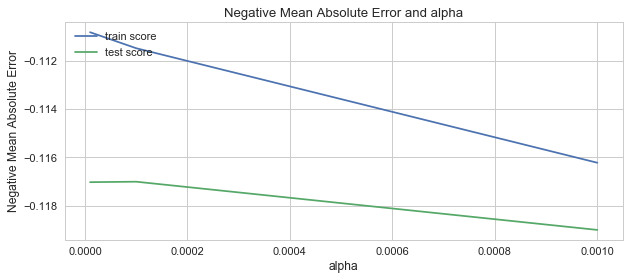

In [227]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [228]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [229]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

('Lasso Regression train r2:', 0.8038794987861319)
('Lasso Regression test r2:', 0.6572044610555207)


In [230]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [231]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,GrLivArea,11.561268,11.561268
1,GarageArea,1.681117,1.681117
3,MSZoning_FV,-0.742961,0.742961
2,Age,0.632054,0.632054
11,Foundation_Wood,-0.536321,0.536321
